In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model('./document_classifier.h5')

In [25]:
image_names = list(os.walk('./test images'))[0][2]

In [26]:
images = []
for dir in image_names:

    img = np.array(Image.open(f"./test images/{dir}"))
    if img is not None:
        img = cv2.resize(img,(128,128))
        if(img.shape == (128,128,3)):
            images.append(img)

In [27]:
images = np.array(images)

In [28]:
images.shape

(6, 128, 128, 3)

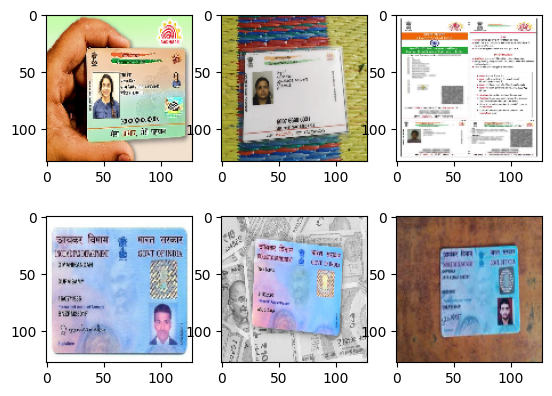

In [29]:
fig, ax = plt.subplots(2,3)
k=0
for i in range(2):
    for j in range(3):
        if k >= images.shape[0]:
            break
        ax[i][j].imshow(images[k])
        k+=1

In [30]:
predictions = model.predict(images)

1/1 [==============================] - 0s 19ms/step


In [31]:
for p in predictions:
    print(int(np.round(p)))

0
0
0
1
1
1


In [34]:
X_test = np.load('./x_test.npy')
y_test = np.load('./y_test.npy')

In [36]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 80ms/step


In [40]:
y_pred = [int(np.round(p)) for p in predictions]

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [42]:
confusion_matrix(y_pred,y_test)

array([[91,  0],
       [ 0, 58]], dtype=int64)

In [43]:
print(f"Precision : {precision_score(y_pred,y_test)}")
print(f"Recall : {recall_score(y_pred,y_test)}")
print(f"F1 Score : {f1_score(y_pred,y_test)}")

Precision : 1.0
Recall : 1.0
F1 Score : 1.0
